In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('서울종합DB(어린이인구).csv', encoding='cp949')

# 예측에 사용할 특성 선택
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델들 초기화
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

Linear Regression - Mean Squared Error: 163.81449750474547, R-squared: 0.8822968776910204
Gradient Boosting - Mean Squared Error: 563.2020417548988, R-squared: 0.5953310615660036
Random Forest - Mean Squared Error: 467.49782000000005, R-squared: 0.6640959504512272
Decision Tree - Mean Squared Error: 697.4, R-squared: 0.49890785767661083


1.Decision Tree

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('서울종합DB(어린이인구).csv', encoding='cp949')

# 예측에 사용할 특성 선택
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest 모델 초기화 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# 선택된 모델로 전체 데이터에 대한 예측
data['예측어린이사고수'] = model.predict(scaler.transform(selected_features))

# 결과 저장 (인덱스 제외)
data.to_csv('서울종합DB_with_DecisionTree.csv', index=False)

Mean Squared Error: 697.4, R-squared: 0.49890785767661083


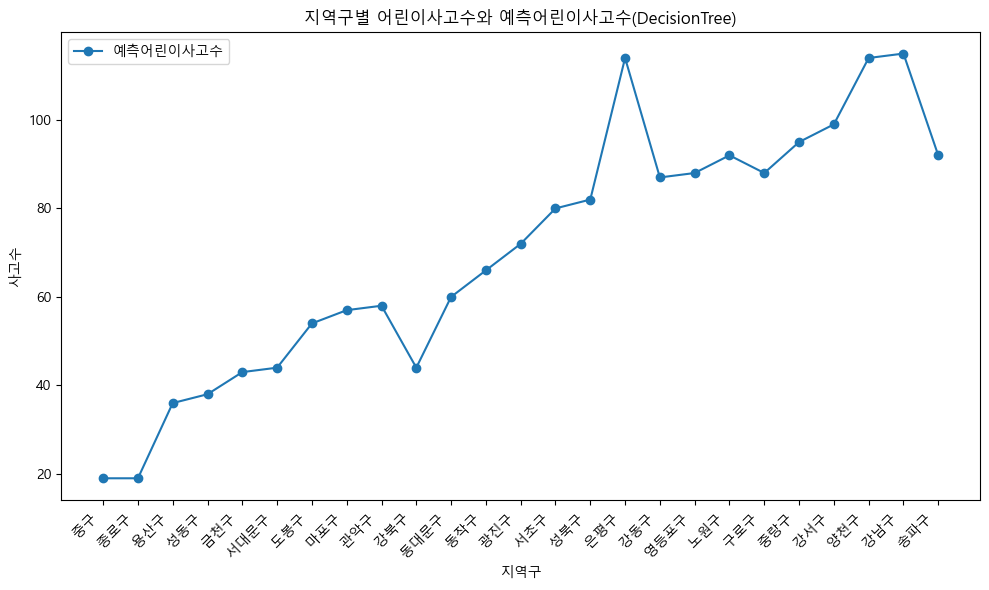

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울종합DB_with_DecisionTree.csv', encoding='utf-8')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(DecisionTree)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_12724\1903459137.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


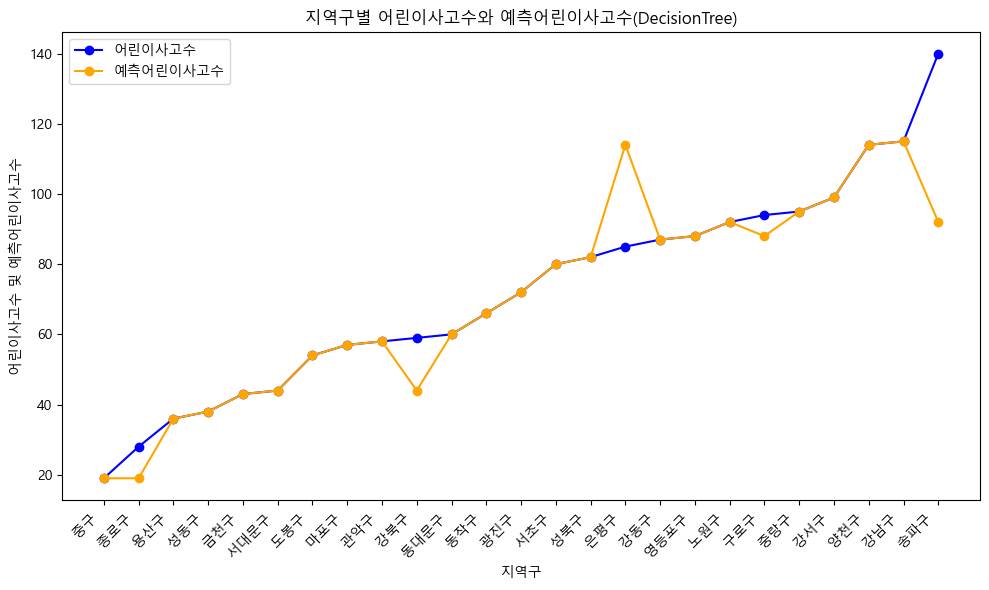

In [4]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수 및 예측어린이사고수', color='black')  # Y축 레이블 수정
ax1.tick_params(axis='y', labelcolor='black')  # Y축 눈금 색상 수정

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(DecisionTree)')
fig.tight_layout()

# 범례 표시
ax1.legend(loc='upper left')

plt.show()

2.GradientBoosting

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('서울종합DB(어린이인구).csv', encoding='cp949')

# 예측에 사용할 특성 선택
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest 모델 초기화 및 학습
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# 선택된 모델로 전체 데이터에 대한 예측
data['예측어린이사고수'] = model.predict(scaler.transform(selected_features))

# 결과 저장 (인덱스 제외)
data.to_csv('서울종합DB_with_GradientBoosting.csv', index=False)

Mean Squared Error: 563.2020417548988, R-squared: 0.5953310615660036


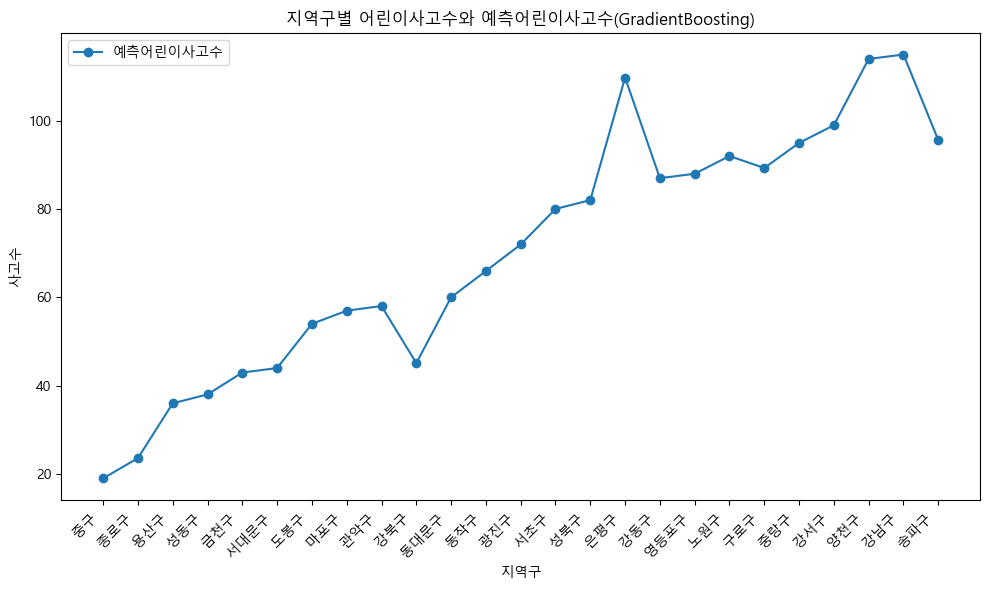

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울종합DB_with_GradientBoosting.csv', encoding='utf-8')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(GradientBoosting)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_12724\905196436.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


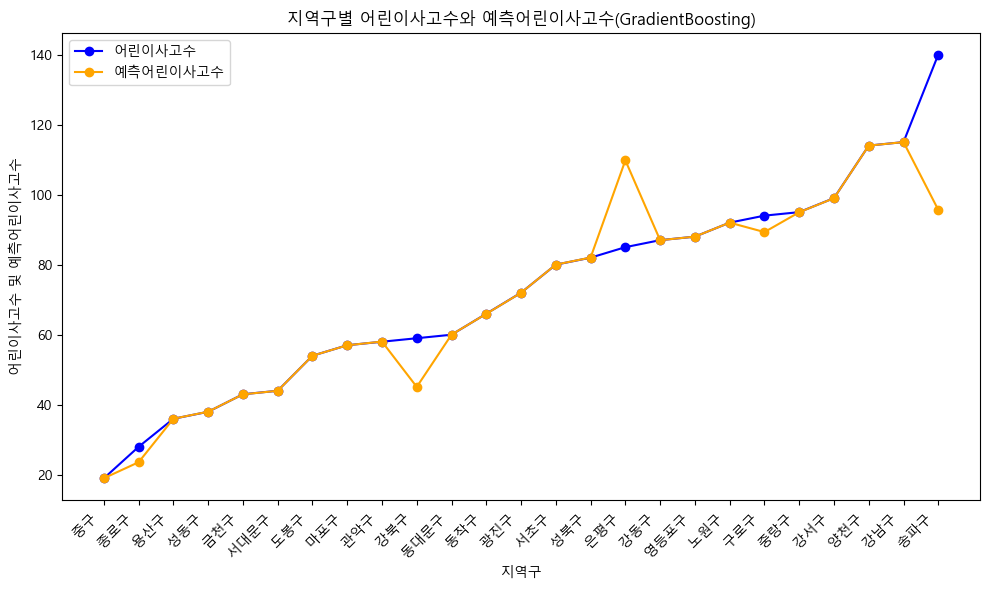

In [7]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수 및 예측어린이사고수', color='black')  # Y축 레이블 수정
ax1.tick_params(axis='y', labelcolor='black')  # Y축 눈금 색상 수정

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(GradientBoosting)')
fig.tight_layout()

# 범례 표시
ax1.legend(loc='upper left')

plt.show()

test

In [9]:
import pandas as pd

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울종합DB_with_GradientBoosting.csv', encoding='utf-8')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='예측어린이사고수')

# 출력
print(sorted_df[['지역구', '어린이사고수', '예측어린이사고수']])

      지역구  어린이사고수    예측어린이사고수
1     중구       19   19.022706
0    종로구       28   23.599256
2    용산구       36   36.007586
3    성동구       38   38.030214
17   금천구       43   42.975183
12  서대문구       44   43.995138
8    강북구       59   45.103104
9    도봉구       54   54.003651
13   마포구       57   56.986756
20   관악구       58   58.042644
5   동대문구       60   60.018470
19   동작구       66   65.968938
4    광진구       72   71.978304
21   서초구       80   80.022043
7    성북구       82   82.028864
24   강동구       87   86.986104
18  영등포구       88   88.001769
16   구로구       94   89.305825
10   노원구       92   92.002950
6    중랑구       95   94.966200
23   송파구      140   95.646854
15   강서구       99   98.977036
11   은평구       85  109.784735
14   양천구      114  113.989825
22   강남구      115  114.995618


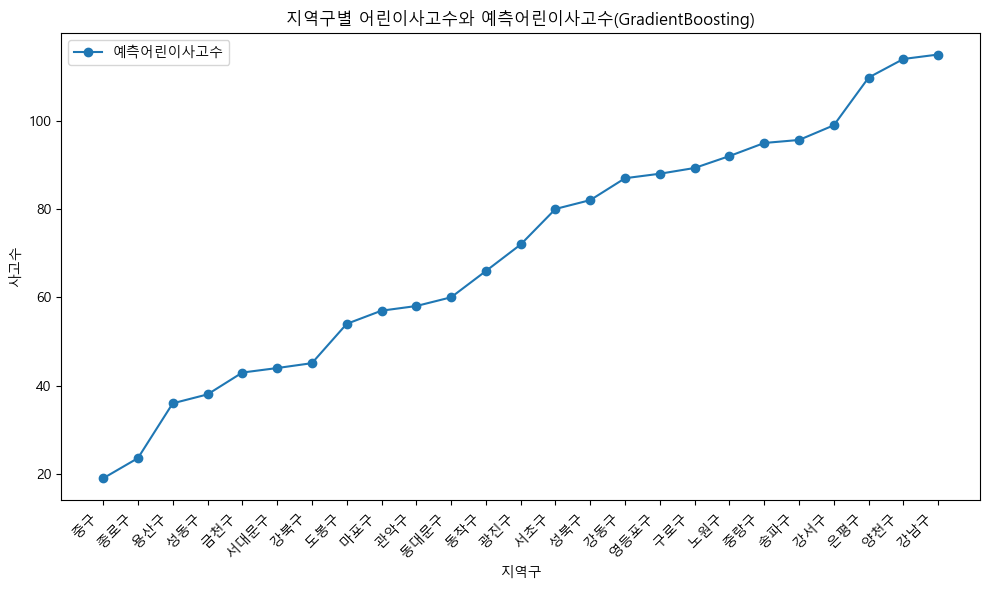

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울종합DB_with_GradientBoosting.csv', encoding='utf-8')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='예측어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(GradientBoosting)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_12724\905196436.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


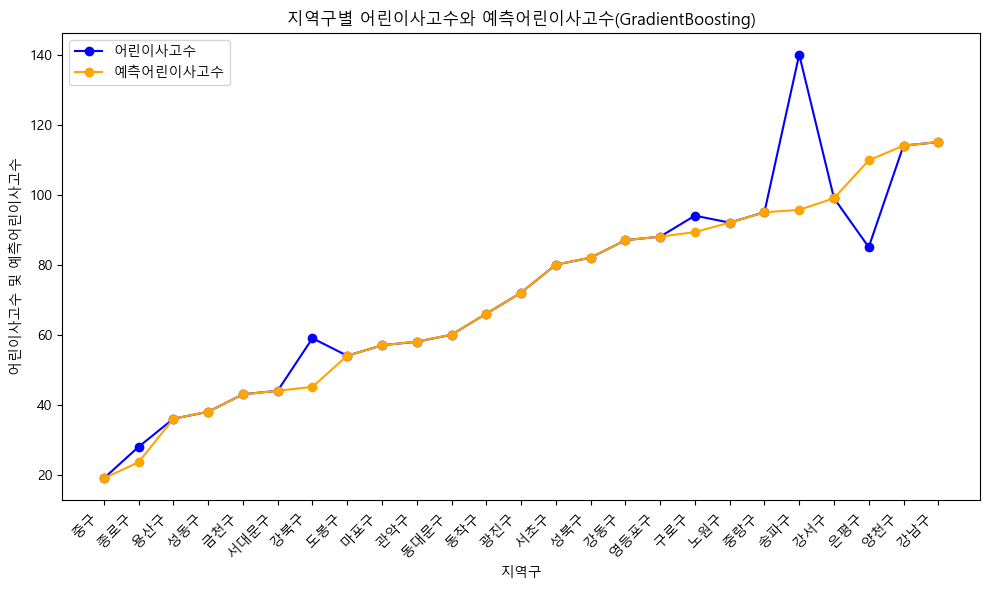

In [11]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수 및 예측어린이사고수', color='black')  # Y축 레이블 수정
ax1.tick_params(axis='y', labelcolor='black')  # Y축 눈금 색상 수정

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(GradientBoosting)')
fig.tight_layout()

# 범례 표시
ax1.legend(loc='upper left')

plt.show()

3.RandomForest

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('서울종합DB(어린이인구).csv', encoding='cp949')

# 예측에 사용할 특성 선택
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# 선택된 모델로 전체 데이터에 대한 예측
data['예측어린이사고수'] = model.predict(scaler.transform(selected_features))

# 결과 저장 (인덱스 제외)
data.to_csv('서울종합DB_with_RandomForest.csv', index=False)

Mean Squared Error: 467.49782000000005, R-squared: 0.6640959504512272


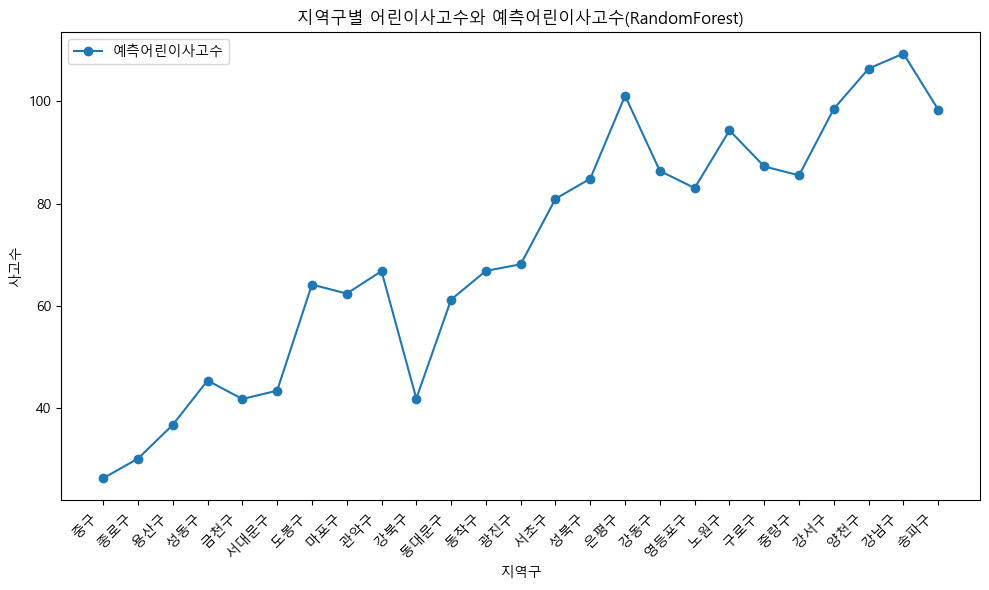

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울종합DB_with_RandomForest.csv', encoding='utf-8')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(RandomForest)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_12724\1527857971.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


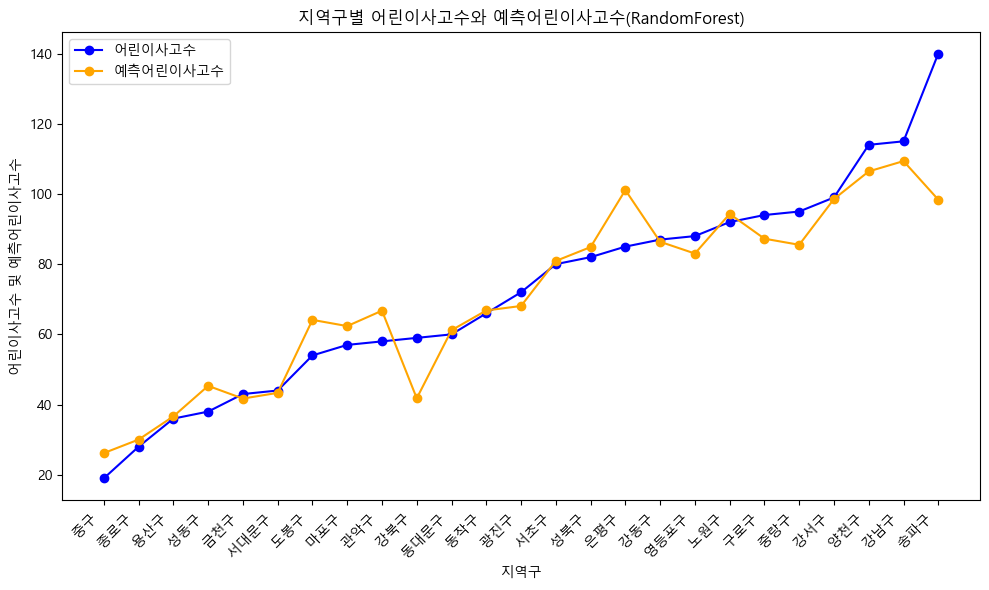

In [14]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수 및 예측어린이사고수', color='black')  # Y축 레이블 수정
ax1.tick_params(axis='y', labelcolor='black')  # Y축 눈금 색상 수정

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(RandomForest)')
fig.tight_layout()

# 범례 표시
ax1.legend(loc='upper left')

plt.show()

4.LinearRegression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (인코딩 지정)
data = pd.read_csv('서울종합DB(어린이인구).csv', encoding='cp949')

# 예측에 사용할 특성 선택
selected_features = data[['인구수', '어린이인구수', '차량등록대수', '어린이공원개수', '어린이집수', '유치원수', '초등학교수', '어린이보호구역CCTV수', '어린이보호구역개수']]

# 타겟 변수 설정
target = data['어린이사고수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 데이터 표준화 (선택적으로 진행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# 선택된 모델로 전체 데이터에 대한 예측
data['예측어린이사고수'] = model.predict(scaler.transform(selected_features))

# 결과 저장 (인덱스 제외)
data.to_csv('서울종합DB_with_LinearRegression.csv', index=False)

Mean Squared Error: 163.81449750474547, R-squared: 0.8822968776910204


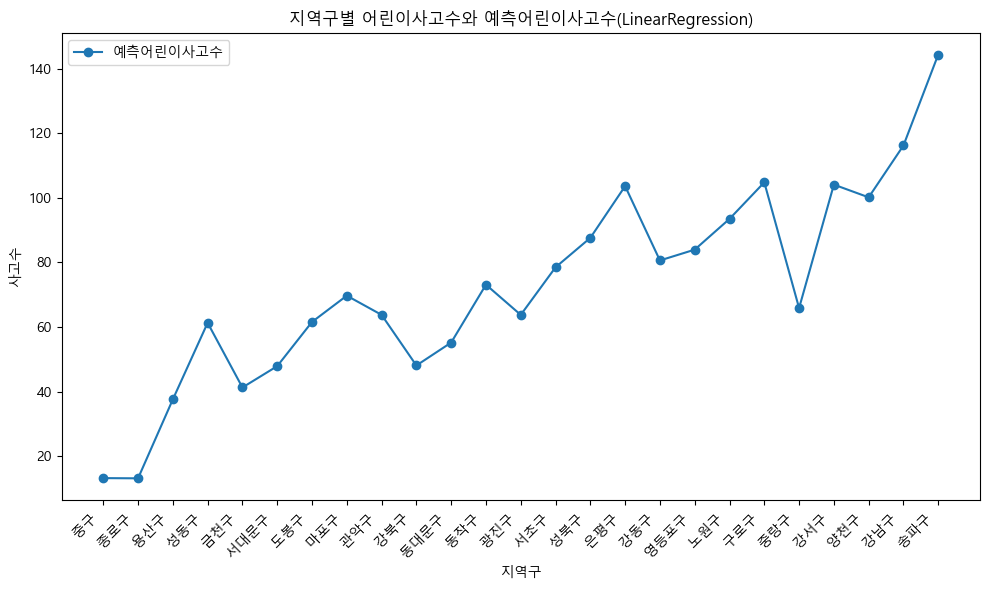

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 서울예측DB.csv 파일 불러오기
seoul_predictions = pd.read_csv('서울종합DB_with_LinearRegression.csv', encoding='utf-8')

# 어린이사고수를 기준으로 데이터 정렬
sorted_df = seoul_predictions.sort_values(by='어린이사고수')

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o')

plt.title('지역구별 어린이사고수와 예측어린이사고수(LinearRegression)')
plt.xlabel('지역구')
plt.ylabel('사고수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_12724\1265781278.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')


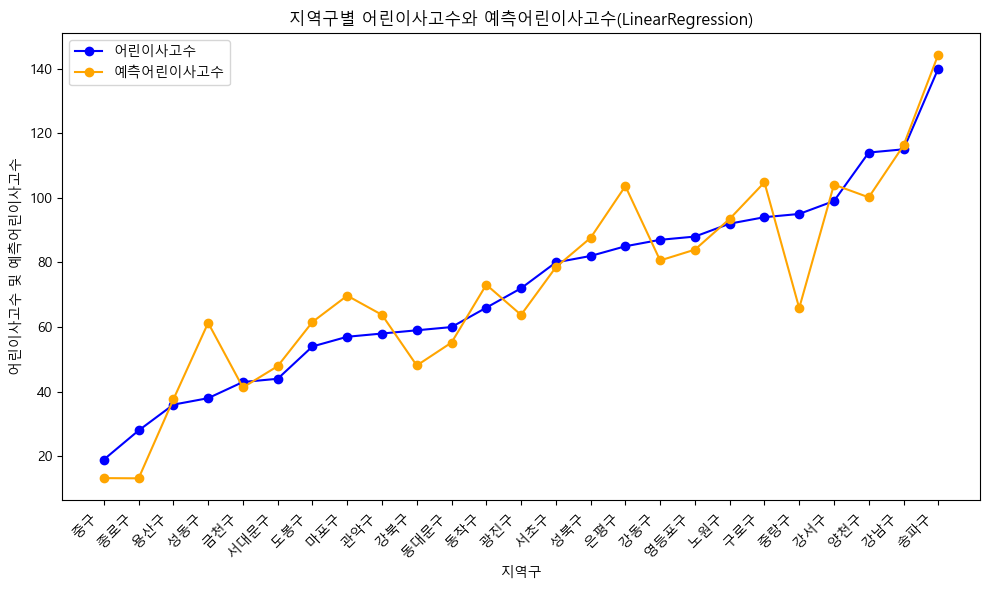

In [17]:
# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 어린이사고수 그래프
ax1.plot(sorted_df['지역구'], sorted_df['어린이사고수'], label='어린이사고수', marker='o', color='blue')
ax1.plot(sorted_df['지역구'], sorted_df['예측어린이사고수'], label='예측어린이사고수', marker='o', color='orange')
ax1.set_xlabel('지역구')
ax1.set_ylabel('어린이사고수 및 예측어린이사고수', color='black')  # Y축 레이블 수정
ax1.tick_params(axis='y', labelcolor='black')  # Y축 눈금 색상 수정

# X축의 텍스트 45도 회전
ax1.set_xticklabels(sorted_df['지역구'], rotation=45, ha='right')

# 제목과 범례 추가
plt.title('지역구별 어린이사고수와 예측어린이사고수(LinearRegression)')
fig.tight_layout()

# 범례 표시
ax1.legend(loc='upper left')

plt.show()

In [19]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# CSV 파일 불러오기
df = pd.read_csv('실제vs예측2.csv', encoding='cp949')

# 모델별 MSE 계산
mse_decision_tree = mean_squared_error(df['어린이사고수'], df['DecisionTree'])
mse_gradient_boosting = mean_squared_error(df['어린이사고수'], df['Gradient Boosting'])
mse_random_forest = mean_squared_error(df['어린이사고수'], df['Random Forest'])
mse_linear_regression = mean_squared_error(df['어린이사고수'], df['Linear Regression'])

# 결과 출력
print(f'Decision Tree - Mean Squared Error: {mse_decision_tree}')
print(f'Gradient Boosting - Mean Squared Error: {mse_gradient_boosting}')
print(f'Random Forest - Mean Squared Error: {mse_random_forest}')
print(f'Linear Regression - Mean Squared Error: {mse_linear_regression}')

Decision Tree - Mean Squared Error: 139.48
Gradient Boosting - Mean Squared Error: 112.62179999999996
Random Forest - Mean Squared Error: 115.565684
Linear Regression - Mean Squared Error: 118.80507600000003
